In [19]:
# random forest
# bibliotheken importieren:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,classification_report
from sklearn.tree import plot_tree


In [20]:

# datensatz holen und bei bedarf mit "delimiter" einstellen:
# --> werte durch zeichen, z.b. ";" trennen!!
df = pd.read_csv("winequality-white.csv",delimiter=";")


In [21]:

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:

# min-max werte:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [23]:

def neu_target(data):
    
    if data["quality"] <= 6:
            return 0
    else:
        return 1


In [24]:

df["quality"] = df[["quality"]].apply(neu_target,axis=1)


In [25]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [26]:

# einzigartige werte beim target ("quality"):
df["quality"].unique()


array([0, 1], dtype=int64)

<Axes: xlabel='quality', ylabel='Count'>

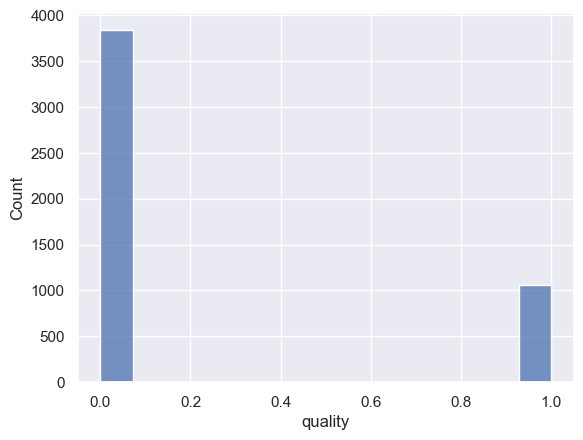

In [27]:

sns.histplot(data=df,x="quality")


In [28]:

# trainingssatz:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["quality"],axis=1), df["quality"], test_size=0.2, random_state=0)


In [29]:

# parameter einstellen, wie viele fragen,trees.., tiefe des baumes:
clf = RandomForestClassifier(max_depth=2,random_state=1,n_estimators=150)


In [30]:

# trainieren:
clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=2, n_estimators=150, random_state=1)

In [31]:

# vorhersagen:
pred = clf.predict(X_test)


In [32]:

# auswertung:
report = classification_report(y_test,pred)
print(report)


              precision    recall  f1-score   support

           0       0.78      1.00      0.88       764
           1       0.00      0.00      0.00       216

    accuracy                           0.78       980
   macro avg       0.39      0.50      0.44       980
weighted avg       0.61      0.78      0.68       980



C:\Users\dietm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dietm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dietm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:

print("Im Schnitt sind wir um {:.2f} von der wahren Qualität entfernt.".format(mean_absolute_error(y_test,pred)))


Im Schnitt sind wir um 0.22 von der wahren Qualität entfernt.


<Axes: >

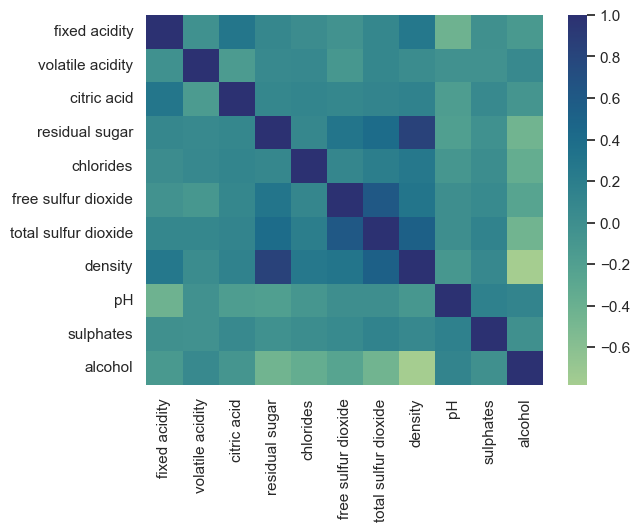

In [34]:

sns.heatmap(df.drop(["quality"],axis=1).corr(),cmap="crest")


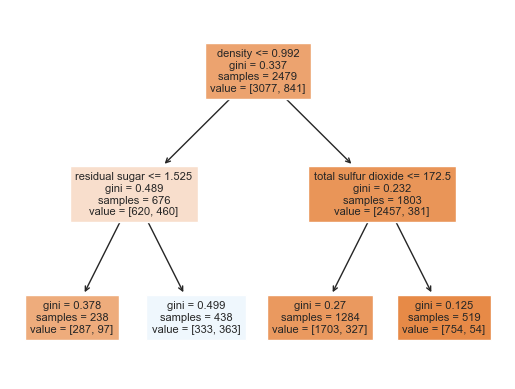

In [35]:


# visualisieren (57.baum):
plot_tree(clf.estimators_[57],filled=True,fontsize=8,feature_names=list(df.columns))
plt.show()
    